In [221]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#df = pd.read_csv()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##finding available datasets

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-complete-dataset-20082020/matches.csv
/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv


In [222]:
#Cricket match analysis and predictions 

##Introduction
#This project aims to analyse cricket match data and extract insights 
    #Impact of toss on match outcome
    #Most successful teams and players 
    #Prediction of match winners 

In [223]:
#loading the dataset
df = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')

#display first few rows
print(df.head())

       id   season        city        date match_type player_of_match  \
0  335982  2007/08   Bangalore  2008-04-18     League     BB McCullum   
1  335983  2007/08  Chandigarh  2008-04-19     League      MEK Hussey   
2  335984  2007/08       Delhi  2008-04-19     League     MF Maharoof   
3  335985  2007/08      Mumbai  2008-04-20     League      MV Boucher   
4  335986  2007/08     Kolkata  2008-04-20     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkat

In [224]:
#display all column names
list(df.columns)

['id',
 'season',
 'city',
 'date',
 'match_type',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'result_margin',
 'target_runs',
 'target_overs',
 'super_over',
 'method',
 'umpire1',
 'umpire2']

In [225]:
#checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [226]:
#checking data values
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [227]:
df.describe(include='object')

,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over,method,umpire1,umpire2
count,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1095,21,1095,1095
unique,17,36,823,8,291,58,19,19,19,2,19,4,2,1,62,62
top,2013,Mumbai,2017-04-09,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,N,D/L,AK Chaudhary,S Ravi
freq,76,173,2,1029,25,77,135,138,143,704,144,578,1081,21,115,83


In [228]:
#dataset dimension - no of rows, columns
df.shape

(1095, 20)

In [229]:
#finding how many missing values exist for each column
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [230]:
#percentage of missing values per columns
df.isna().sum()/len(df)*100

id                  0.000000
season              0.000000
city                4.657534
date                0.000000
match_type          0.000000
player_of_match     0.456621
venue               0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
winner              0.456621
result              0.000000
result_margin       1.735160
target_runs         0.273973
target_overs        0.273973
super_over          0.000000
method             98.082192
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [231]:
#Filling catergorical columns with 'unknown'
df.fillna({col: 'Unknown' for col in df.select_dtypes(include=['object']).columns}, inplace=True)

In [232]:
#dropping uneccessary columns 
df.drop(['match_type','target_overs','method'],axis=1,inplace=True)
df.head()

,id,season,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,super_over,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,N,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,N,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,N,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,N,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,N,BF Bowden,K Hariharan


In [233]:
df.drop(['date','umpire1','umpire2','target_runs','result_margin'],axis=1,inplace=True)
df.head()

,id,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over
0,335982,2007/08,Bangalore,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,N
1,335983,2007/08,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,N
2,335984,2007/08,Delhi,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,N
3,335985,2007/08,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,N
4,335986,2007/08,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,N


<function matplotlib.pyplot.show(close=None, block=None)>

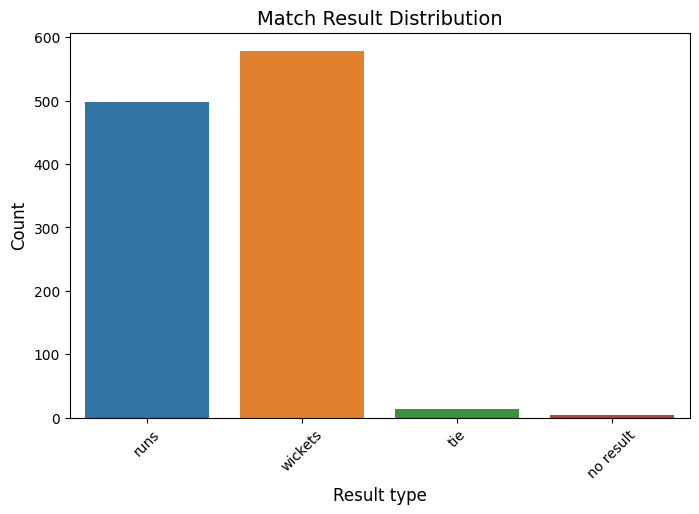

In [234]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df,x='result')
plt.title('Match Result Distribution',fontsize=14)
plt.xlabel('Result type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=45)
plt.show

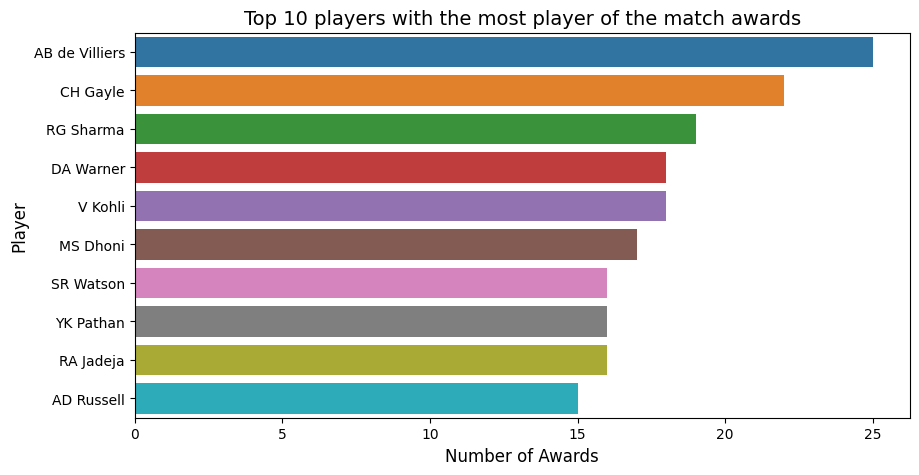

In [235]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['player_of_match'],order=df['player_of_match'].value_counts().index[:10])
plt.title('Top 10 players with the most player of the match awards',fontsize=14)
plt.xlabel('Number of Awards',fontsize=12)
plt.ylabel('Player',fontsize=12)
plt.show()

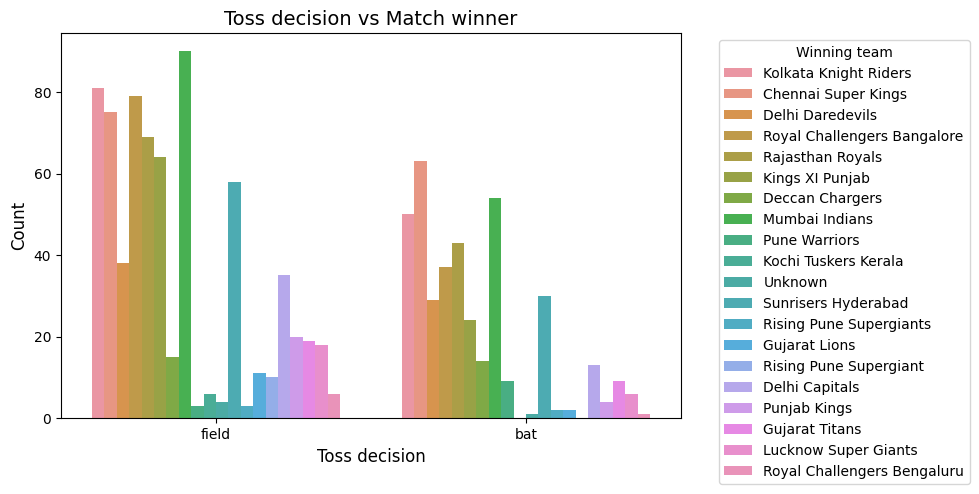

In [236]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='toss_decision',hue='winner')
plt.title('Toss decision vs Match winner',fontsize=14)
plt.xlabel('Toss decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.legend(title='Winning team',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()

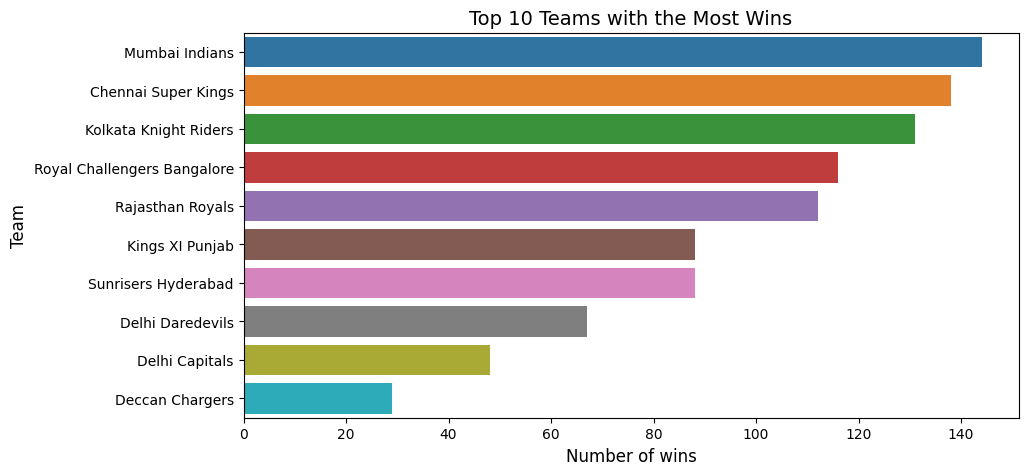

In [237]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['winner'],order=df['winner'].value_counts().index[:10])
plt.title('Top 10 Teams with the Most Wins',fontsize=14)
plt.xlabel('Number of wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.show()

In [238]:
df['toss_win_match_win'] = np.where(df['toss_winner'] == df['winner'],1,0)
df.head()

,id,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over,toss_win_match_win
0,335982,2007/08,Bangalore,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,N,0
1,335983,2007/08,Chandigarh,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,N,1
2,335984,2007/08,Delhi,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,N,0
3,335985,2007/08,Mumbai,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,N,0
4,335986,2007/08,Kolkata,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,N,0


In [239]:
#encoding categorical values  
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

categorical_cols = ['city', 'player_of_match', 'venue', 
                    'team1', 'team2', 'winner', 'result', 'super_over']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
df.head()

,id,season,city,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,super_over,toss_win_match_win
0,335982,2007/08,2,37,23,16,8,Royal Challengers Bangalore,field,8,1,0,0
1,335983,2007/08,7,149,40,6,0,Chennai Super Kings,bat,0,1,0,1
2,335984,2007/08,10,150,16,3,13,Rajasthan Royals,bat,3,3,0,0
3,335985,2007/08,26,167,55,10,16,Mumbai Indians,bat,16,3,0,0
4,335986,2007/08,23,57,14,8,1,Deccan Chargers,bat,8,3,0,0


In [240]:
df.isnull().sum()

id                    0
season                0
city                  0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
super_over            0
toss_win_match_win    0
dtype: int64

In [241]:
from sklearn.impute import SimpleImputer 

imputer_toss = SimpleImputer(strategy='most_frequent')
df['toss_winner'] = imputer_toss.fit_transform(df[['toss_winner']])

print(df['toss_winner'].isnull().sum())

ValueError: 2

In [ ]:
#spliting the dataset to features and trget variable
feature_cols = ['team1','team2','toss_decision','toss_winner','result']
X = df[feature_cols]
y = df.winner #target variable 

In [ ]:
#scaling input variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [ ]:
#splitting x and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1,y,test_size=0.25,random_state=0)
print('Whole Data Shape',df.shape)
print('X1 train shape',X1_train.shape)
print('x1 test shape',X1_test.shape)
#.25 - 25% testing
#.75 - 75% training

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [10, 20, 30, None],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

#grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

#grid_search.fit(X1_train, y_train)

#print(f"Best Hyperparameters: {grid_search.best_params_}")
#print(f"Best Cross-validation Accuracy: {grid_search.best_score_}")

In [ ]:
#instantiate the model
#creating a logistic regression classifier object 
#fitting the model on the trai set
#perfoming predictions on pred 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X1_train,y_train)

y_pred = model.predict(X1_test)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred))

In [ ]:
#displaying predicted values
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels = logreg.classes_)

disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import RocCurveDisplay
Logreg_roc = RocCurveDisplay.from_estimator(logreg,X1_test,y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['team1'] = label_encoder.fit_transform(df['team1'])

team_mapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
reverse_mapping = {v: k for k, v in team_mapping.items()}